# 1. The Machine Learning Landscape
___

## What is machine learning?

* Is the science of programming computers so they can learn from data.
* A computer program that is said to learn from experience with respect to some task and some performance measure.

## Why use machine learning?

* Machine learning algorithms can simplify code and performe better in tasks that require hand-tuning or long lists of rules.
* Usefeul in complex problems for which there is no good traditional solution.
* Can adapt to fluctuating environments.
* Helps to get insights about complex problems and large amounts of data.

## Types of machine learning systems

Machine learning systems can be classified in categories based on:

* Supervision:
    * Supervised
    * Unsuperised
    * Semisupervised
    * Reinforcement learning


* Incrementally learning:
    * Online learning
    * Batch learning


* Base of learning:
    * Instance-based
    * model-based

## Supervision
### Supervised learning

Supervised learning includes *labels* for the training data.

Typical supervised tasks include:
* Clasiffication: Spam filter in a mailbox.
* Regression: Price of a car given a set of *features* (*predictors*).


The most important supervised learning algorithms are:
* k-Neares Neighbors
* Linear Regression
* Logistic Regression
* Suport Vector Machines (SVM's)
* Decision Trees and Random Forests
* Neural networks

### Unsupervised learning

In unsupervised learning systems the data in unlabeled 

Some of the most important unsupervised algorithms are:
* Clustering:
    * k-Means
    * Hirearchical Cluster Analysis (HCA)
    * Expectation Maximizations
    
    
* Visualization and dimensionality reduction:
    * Principal Component Analysis (PCA)
    * Kernel PCA
    * Locally-Linear Embedding (LLE)
    * t-distributed Stochastic Neighbor Embedding (t-SNE)
    
    
* Association rule learning:
    * Apriori
    * Eclat

### Semisupervised learning

Algorithms that can deal with partially labeled training data.

Most semisupervised learning algorithms are combinations of unsupervised and supervised algorithms.

### Reinforcement learning

The learning system or *agent* can observe the enviroment, select and perform actions and get rewards or penalties in return. It learns by itself the what is the best strategy or *policy*.


## Incrementally learning
### Batch learnign

In this type of learning the system is unable to learn incrementally, and need to be retrained periodically using all the existing data. This is called offline learning.

Batch learning systems are simple and often work fine, but training the full set of data can take a long time.

### Online learning

Online learning can train the system incrementally by feeding data instances sequentially. This is great for systems that recive data as continous flow and need to adapt to change rapidly.

Online learning algorithms are also used to train systems on big datasets that can't fit in one machine's memory. The algorithm chop the data into pieces and runs the training proces for each piece.


The learning rate of the algorithm is important as it sets the velocity at which the old data will be forgotten. It is important to monitor the imput data and react to abnormal data.



## Base of learning
### Instance-based learning
The system learns the ecamples by heart, then generalizes to new cases using similarity measures.

### Model-based learning

Build a model of the examples and use the model to make predictions.

## Example 1.1

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

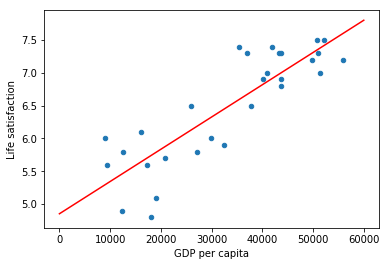

[[5.96242338]]


In [42]:
# Data loading
oecd_bli = pd.read_csv('Desktop\\Books\\Hands-On Machine Learning\\handson-ml-master\\datasets\\lifesat\\oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('Desktop\\Books\\Hands-On Machine Learning\\handson-ml-master\\datasets\\lifesat\\gdp_per_capita.csv', thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')

# Data preparation
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualization of data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
x1 = np.linspace(0,60000,100)
y1 = lin_reg_model.intercept_[0]+lin_reg_model.coef_[0]*x1
plt.plot(x1,y1,'r')
plt.show()

#Selecting model
lin_reg_model = sklearn.linear_model.LinearRegression()

#Training the model
lin_reg_model.fit(X,y)

#Make a prediction
X_new = [[22587]]
print(lin_reg_model.predict(X_new))


## Main challenges of ML

### Insuficient quantity of training data
It takes a lot of data for most ML algorithms to work properly. Data matters more than algorithms for complex problems.
### Nonrepresentative training data
Training data must be representative of the new cases you want to generalize. If the data sample is to small you can get *sampling noise* and if it is too large you can get *sampling bias*.
### Poor-quality data
Data with errors, outliers and noise will make harder for the system to detect underlying patterns. Cleaning up the data is an essential part of ML.
### Irrelevant features
A good set features to train on is key. This is called feature engineering and it involves:
* Feature selection: Selecting the most useful features.
* Feature extraction: Dimensionality reduction to produce more useful features.
* Feature creation: Gathering new data

### Overfitting the training data
The model performs well on the training data, but it doesn't generalize well. Overfitting happens when the model is to complex relative to the amount and noisiness of trianing data. Posible solutions are:
* Simplify the model by reducing parameters, attributes or constrains
* Gater more training data
* Reduce the noise in the training data


To constrain a model to make it simpler is called *regularization*. The objective is to find the right balance between fitting the data perfectly and keeping the model simple enough to ensure it will generalize well. This can be done by using *hyperparameters*.
### Underfitting the training data
It occurs when the model is too simple. Some solutions are:
* Selecting a more powerful model, with more parameters
* Feature angineering the algorithm
* Reducing the constrains on the model


## Testing and validating

One way to test a model is to split the data into two sets: the *training set* and the *test set*. The error rate on new cases is called the generalization error. If the training error is low but the generalization error is high it means that the model is overfitting the data. (It is common to use 80% of the data for training and hold out 20% for testing)

How to chose the value of a regularization hyperparameter? By using cross-validation between training sets.

If the test set is used to tweek the hyperparameters of the model it risks overfitting the test set, this is the reason of the validation set.
